In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [4]:
# Load the dataset
df = pd.read_csv('preprocessed_data.csv')

# Display basic info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  float64
 1   host_id                         48895 non-null  float64
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   price                           48895 non-null  float64
 6   minimum_nights                  48895 non-null  float64
 7   number_of_reviews               48895 non-null  float64
 8   reviews_per_month               48895 non-null  float64
 9   calculated_host_listings_count  48895 non-null  float64
 10  availability_365                48895 non-null  float64
 11  total_cost_min_stay             48895 non-null  float64
 12  listing_duration_months         

,id,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,...,last_review_2019-06-28,last_review_2019-06-29,last_review_2019-06-30,last_review_2019-07-01,last_review_2019-07-02,last_review_2019-07-03,last_review_2019-07-05,last_review_2019-07-06,last_review_2019-07-07,last_review_Rare
0,-0.999721,-0.309108,Rare,-1.035130,-0.356662,149.0,-0.50,0.173913,-0.776923,5.0,...,0,0,0,0,0,0,0,0,0,1
1,-0.999718,-0.309108,Midtown,0.418407,-0.600278,225.0,-0.50,1.739130,-0.646154,1.0,...,0,0,0,0,0,0,0,0,0,1
2,-0.999665,-0.309090,Harlem,1.177155,0.294476,150.0,0.00,-0.217391,0.117863,0.0,...,0,0,0,0,0,0,0,0,0,0
3,-0.999655,-0.309088,Clinton Hill,-0.519482,-0.087189,89.0,-0.50,11.521739,2.630769,0.0,...,0,0,0,0,0,0,1,0,0,0
4,-0.999595,-0.309064,East Harlem,1.033212,0.249813,80.0,1.75,0.173913,-0.861538,0.0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
def reconstruct_room_type(row):
    if row['room_type_Private room'] == 1:
        return 'Private room'
    elif row['room_type_Shared room'] == 1:
        return 'Shared room'
    else:
        return 'Entire home/apt'

df['room_type'] = df.apply(reconstruct_room_type, axis=1)

In [22]:
def map_neighbourhood_group(row):
    if row['neighbourhood_group_Brooklyn'] == 1:
        return 'Brooklyn'
    elif row['neighbourhood_group_Manhattan'] == 1:
        return 'Manhattan'
    elif row['neighbourhood_group_Queens'] == 1:
        return 'Queens'
    elif row['neighbourhood_group_Rare'] == 1:
        return 'Staten Island'
    else:
        return 'Bronx'

df['neighbourhood_group'] = df.apply(map_neighbourhood_group, axis=1)

Summary for 'room_type':
                 Count  Percentage
room_type                         
Entire home/apt  25409   51.966459
Private room     22326   45.661111
Shared room       1160    2.372431



<ipython-input-23-fffe0a60a6df>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




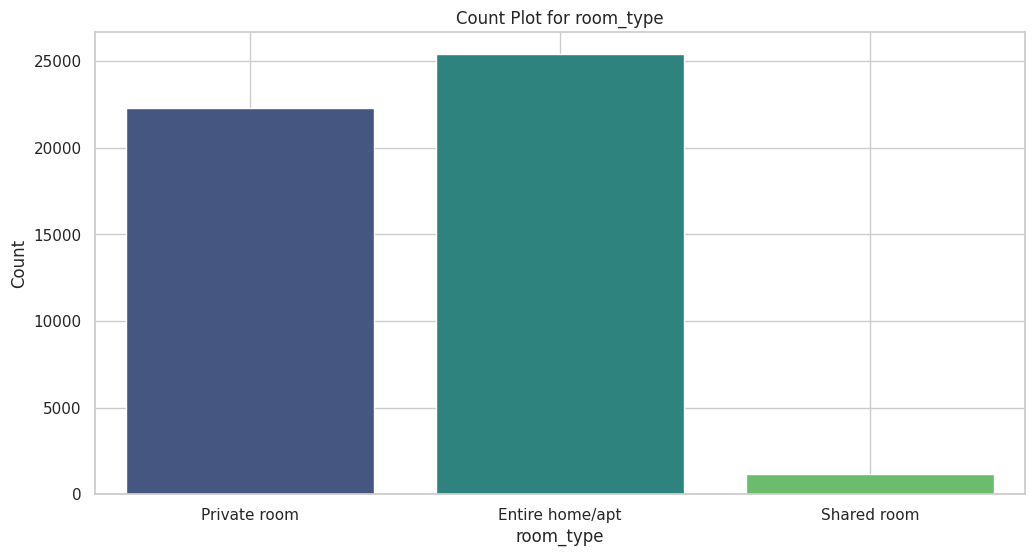

Summary for 'neighbourhood_group':
                     Count  Percentage
neighbourhood_group                   
Manhattan            21661   44.301053
Brooklyn             20104   41.116679
Queens                5666   11.588097
Bronx                 1091    2.231312
Staten Island          373    0.762859



<ipython-input-23-fffe0a60a6df>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




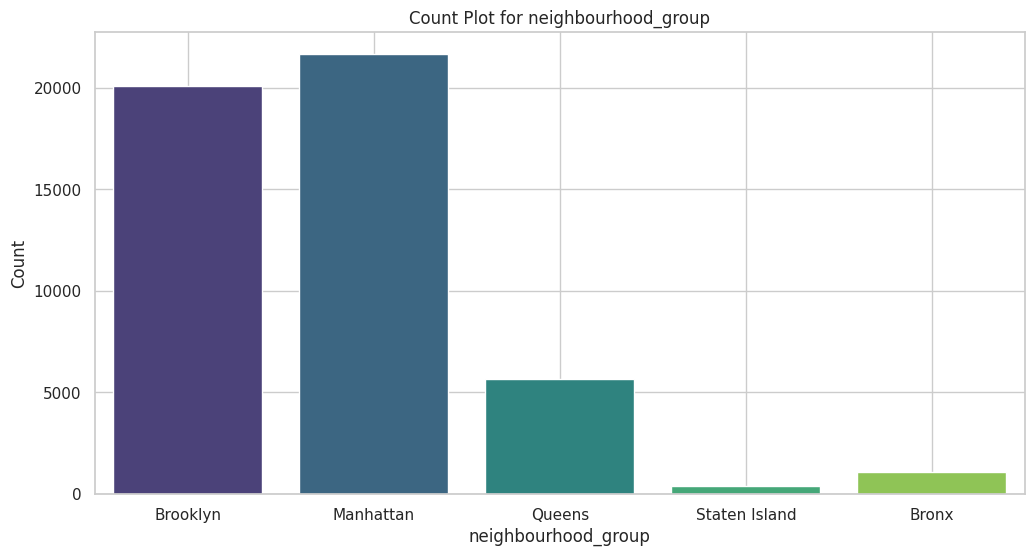

In [23]:
def summarize_categorical(dataframe, column_name, display_plot=False):
    summary = pd.DataFrame({
        "Count": dataframe[column_name].value_counts(),
        "Percentage": 100 * dataframe[column_name].value_counts() / len(dataframe)
    })
    print(f"Summary for '{column_name}':")
    print(summary)
    print()

    if display_plot:
        plt.figure(figsize=(12, 6))
        sns.countplot(x=column_name, data=dataframe, palette="viridis")
        plt.title(f"Count Plot for {column_name}")
        plt.xlabel(column_name)
        plt.ylabel('Count')
        plt.grid(True)
        plt.show()

# Summarize and visualize 'room_type'
summarize_categorical(df, 'room_type', display_plot=True)

# Summarize and visualize 'neighbourhood_group'
summarize_categorical(df, 'neighbourhood_group', display_plot=True)

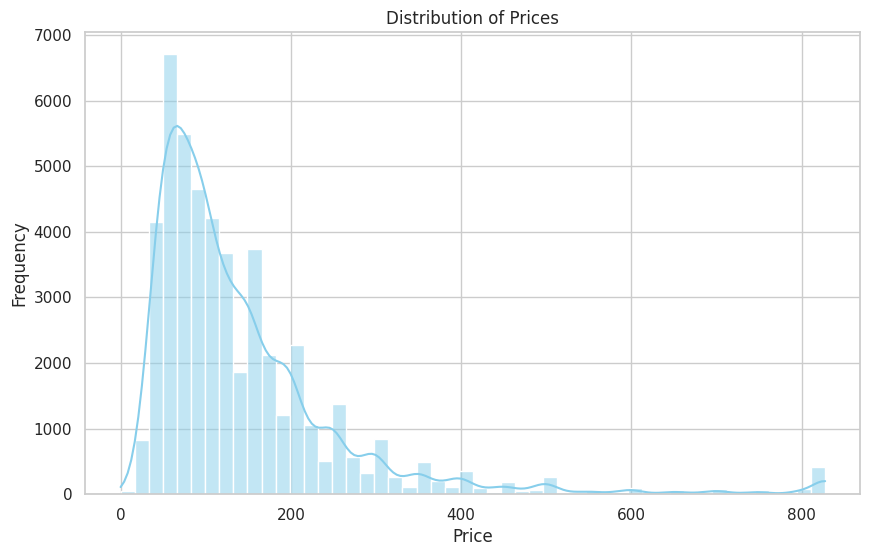

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<ipython-input-25-aeca101c9c60>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




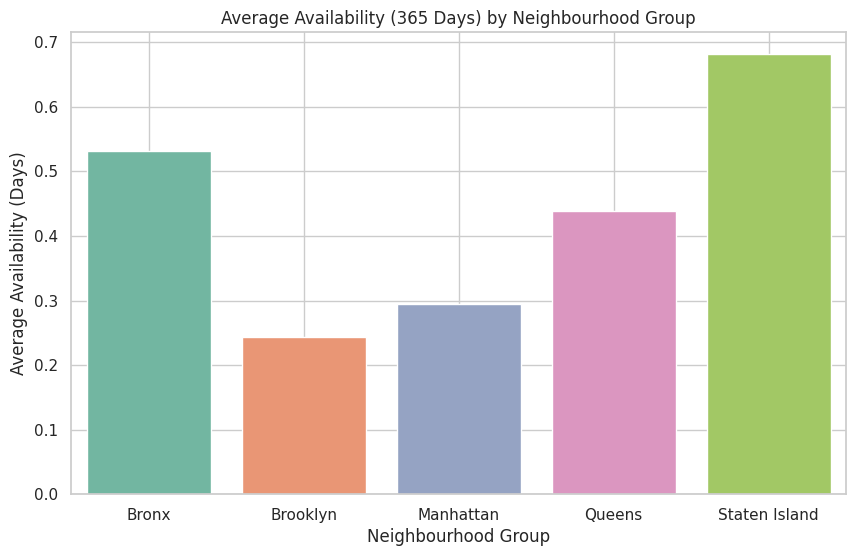

In [25]:
availability_by_neighbourhood = df.groupby('neighbourhood_group')['availability_365'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='neighbourhood_group', y='availability_365', data=availability_by_neighbourhood, palette='Set2')
plt.title('Average Availability (365 Days) by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Availability (Days)')
plt.grid(True)
plt.show()

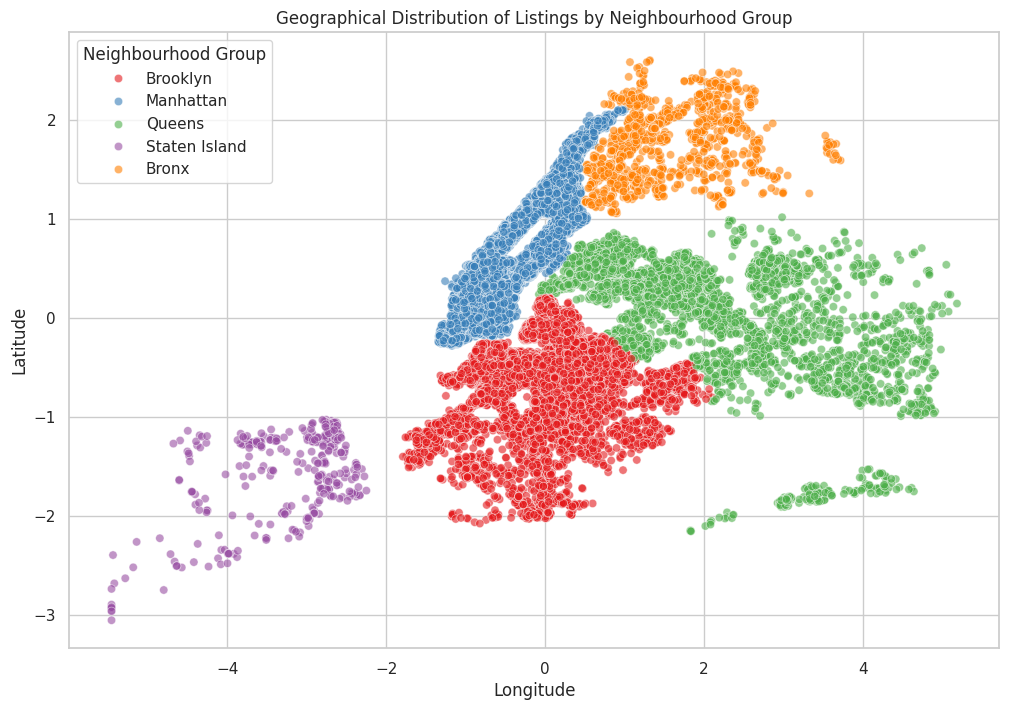

In [27]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='longitude',
    y='latitude',
    hue='neighbourhood_group',
    data=df,
    palette='Set1',
    alpha=0.6
)
plt.title('Geographical Distribution of Listings by Neighbourhood Group')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Neighbourhood Group')
plt.grid(True)
plt.show()

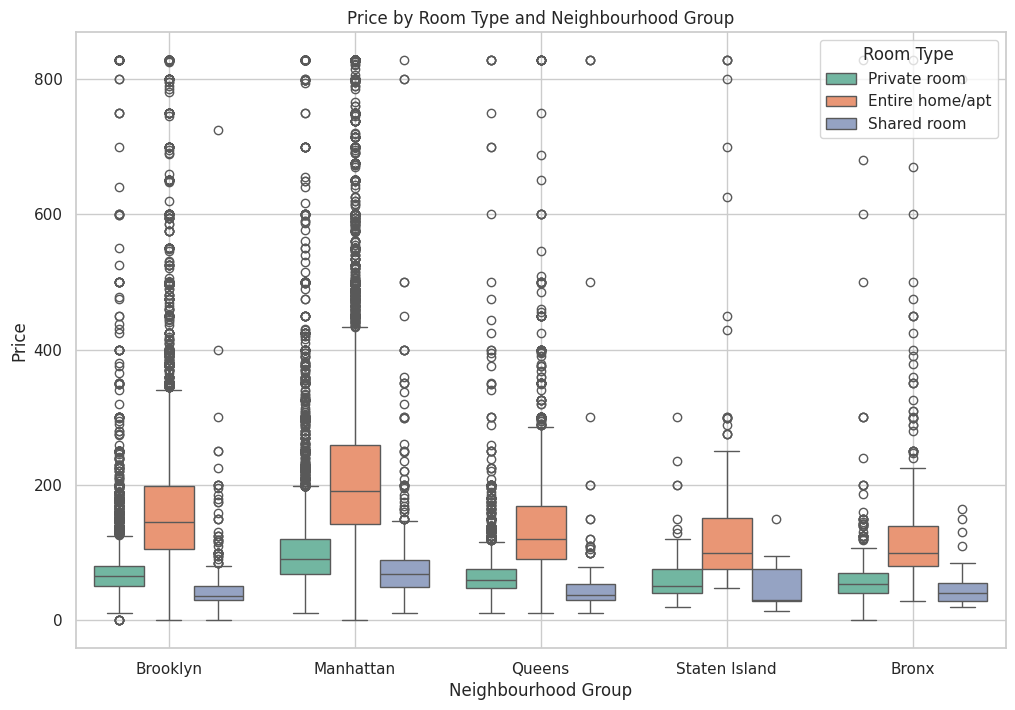

In [28]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='neighbourhood_group', y='price', hue='room_type', data=df, palette='Set2')
plt.title('Price by Room Type and Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.legend(title='Room Type')
plt.grid(True)
plt.show()

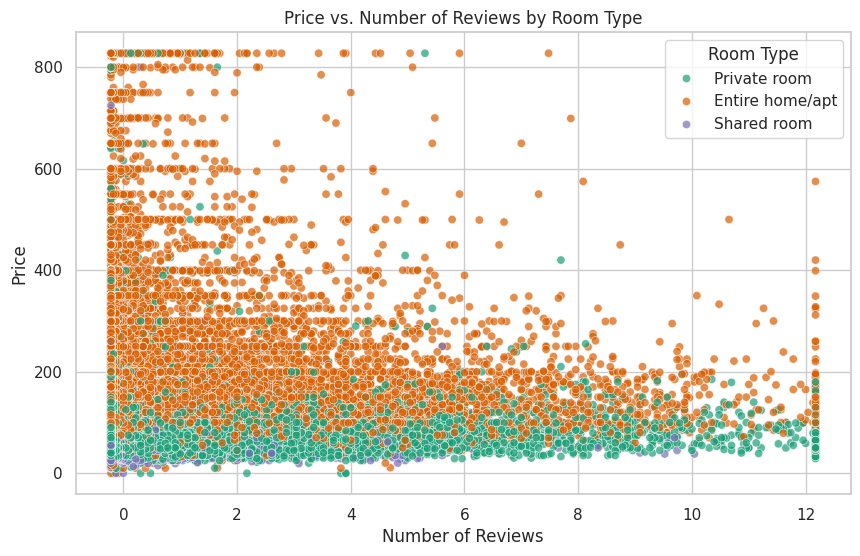

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='number_of_reviews', y='price', hue='room_type', data=df, alpha=0.7, palette='Dark2')
plt.title('Price vs. Number of Reviews by Room Type')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.legend(title='Room Type')
plt.grid(True)
plt.show()

<ipython-input-33-6080aaf68fb2>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




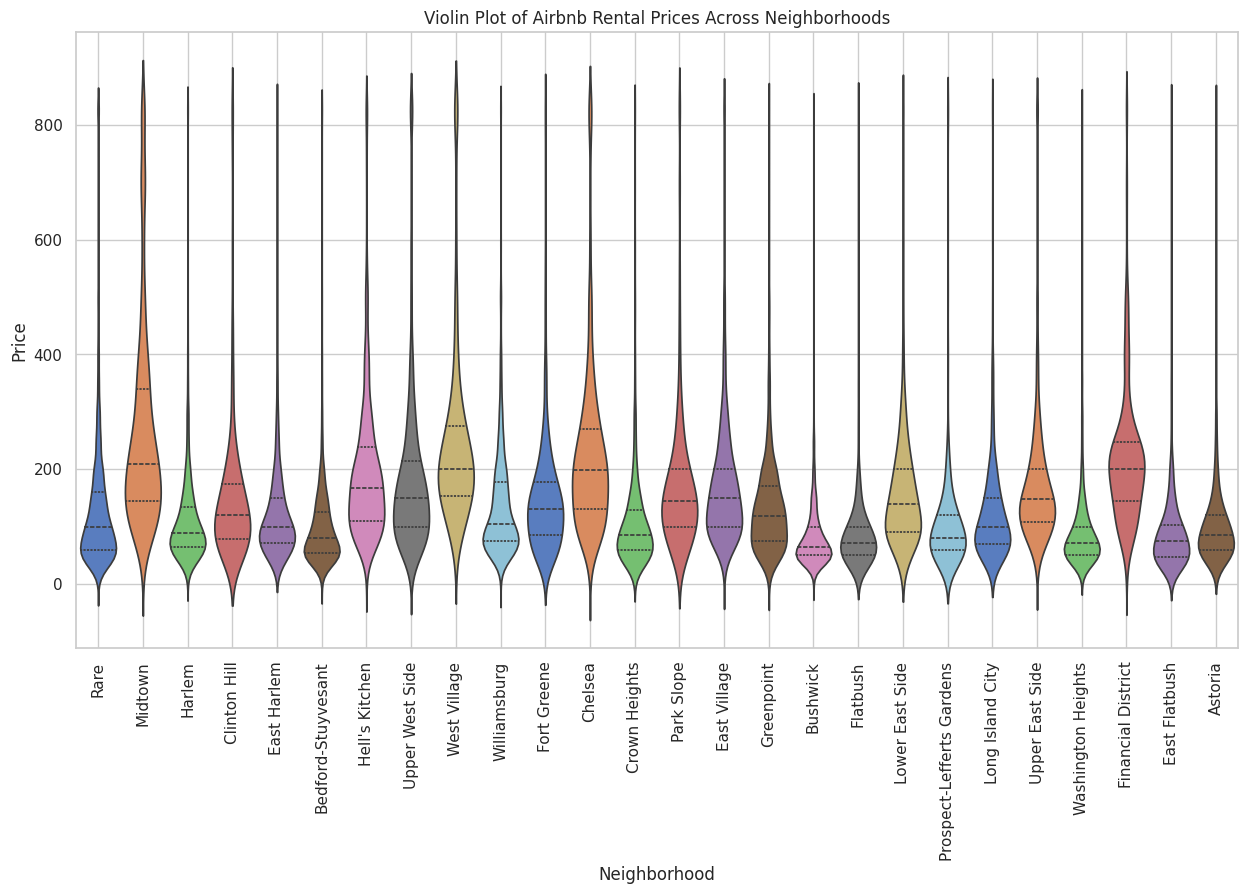

In [33]:
plt.figure(figsize=(15, 8))
sns.violinplot(x='neighbourhood', y='price', data=df, palette='muted', inner='quartile')
plt.title('Violin Plot of Airbnb Rental Prices Across Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

Categorical columns to encode: Index(['neighbourhood'], dtype='object')


<ipython-input-41-c3ba8e18ab3e>:40: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




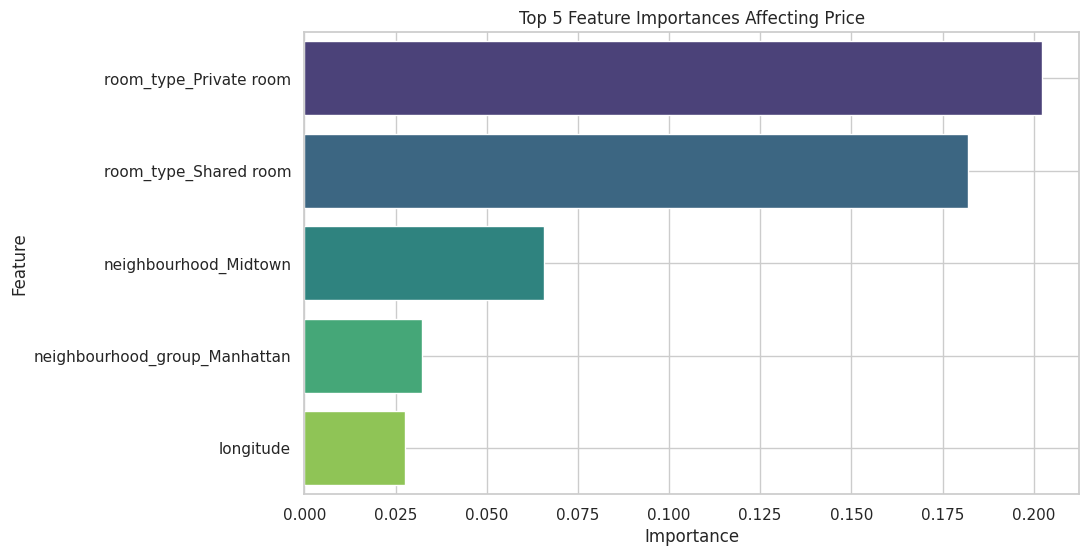

KeyError: 'neighbourhood_Midtown'

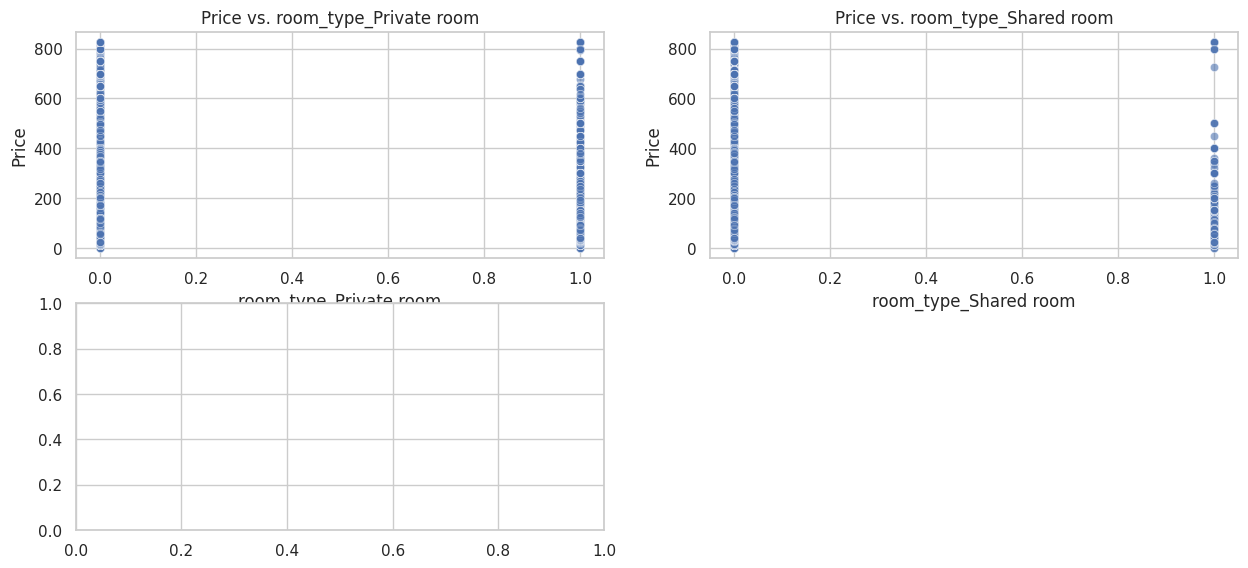

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor

# Load the preprocessed dataset
df = pd.read_csv('preprocessed_data.csv')

# Drop the target variable 'price' and irrelevant columns for X_train
X_train = df.drop(columns=["price", "total_cost_min_stay", "annual_potential_income",
                           "min_potential_income", "availability_365",
                           "calculated_host_listings_count"])

# Target variable
y_train = df['price']

# Identify categorical columns that need encoding
categorical_columns = X_train.select_dtypes(include=['object']).columns
print("Categorical columns to encode:", categorical_columns)

# One-Hot Encode the categorical columns
X_train = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)

# Train the final model
final_model = XGBRegressor(objective='reg:squarederror', random_state=42)
final_model.fit(X_train, y_train)

# Get feature importances
feature_importances = final_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort by importance and select the top 5 features
top_5_features = importance_df.sort_values(by='Importance', ascending=False).head(5)

# Plot the top 5 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_5_features, palette='viridis')
plt.title('Top 5 Feature Importances Affecting Price')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(True)
plt.show()

# Visualize the relationship between each of the top 5 features and price
plt.figure(figsize=(15, 10))

for i, feature in enumerate(top_5_features['Feature'], 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x=df[feature], y=df['price'], alpha=0.6)
    plt.title(f'Price vs. {feature}')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.grid(True)

plt.tight_layout()
plt.show()
